In [83]:
import pandas as pd
from collections import defaultdict
import math
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv("bbc-text.csv")
data = data[:int(0.8*len(data))] ## saving the rest for the testing 
# data

Feature Extraction 1, Bag of words

In [73]:

catagories = ['sport','business','politics','tech','entertainment']
document_len = len(data)
prob_of_catagory = {i:math.log(len(data[data['category']==i])/document_len) for i in catagories}
# print(prob_of_catagory)


In [80]:
# constructing vocabulary
def bag_word():
    txt = data['text']
    Vocabulary = defaultdict(int)
    for i in txt:
        words = i.split()
        for i in words:
            Vocabulary[i] = 0.5
    return Vocabulary

# print(bag_word())

In [81]:
def trainNaiveBayes():

    
    super_dict = defaultdict()

    for i in range(len(catagories)):
        
        data_per_cat = data[data['category'] == catagories[i]]
        
        Vocabulary = bag_word()

        w = data_per_cat['text']
        for word in w:
            word = word.split()
            for k in word:
                Vocabulary[k] += 1

        len_word = sum([i for i in Vocabulary.values() if i != 1])
        for wi in Vocabulary:
            Vocabulary[wi] = math.log(Vocabulary[wi]/len_word)
            
        
        super_dict[catagories[i]] = Vocabulary
    
    return super_dict  
      


In [82]:
test_doc = data[int(0.8*len(data)):]
test_doc = test_doc['text']
Vocabulary = bag_word()
super_dict = trainNaiveBayes()

# important places to look up,
# catagories, prob_of_catagory, Vocabulary and super_dict

def testing(test_doc):

    decision = []
    for k in test_doc:
        big_s = [None]*len(catagories)
        for i in range(len(catagories)):
            data_from_training = super_dict[catagories[i]]
            big_s[i] = prob_of_catagory[catagories[i]] #prior
            words = k.split()
            for w in words:
                if w in Vocabulary:
                    big_s[i] += data_from_training[w]
        cat = catagories[big_s.index(max(big_s))]
        decision.append(cat)

    return decision        

result = testing(test_doc) 
againist = data[int(0.8*len(data)):]['category']

accurate = 0
for i in range(len(result)):
    if result[i] == againist[i+1424]:
        accurate += 1

accuracy =  accurate/len(result)
accuracy

0.9943820224719101

In [88]:
dataS = {
    'Laplace Smoothing': [ 0.1, 0.5, 1.0, 10, 100,500],
    'Accuracy': [0.9971910112359551,0.9943820224719101,0.9887640449438202,0.9353932584269663,0.7359550561797753,0.5084269662921348],

} ## data collected by experimenting with different laplace smoothings...
df = pd.DataFrame(dataS)
df

,Laplace Smoothing,Accuracy
0,0.1,0.997191
1,0.5,0.994382
2,1.0,0.988764
3,10.0,0.935393
4,100.0,0.735955
5,500.0,0.508427


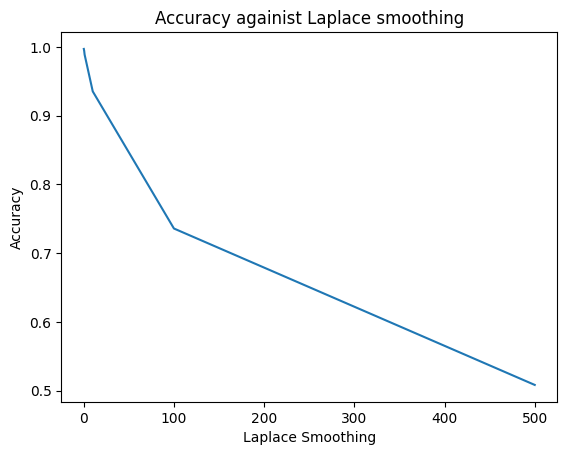

In [89]:
plt.plot(dataS['Laplace Smoothing'],dataS['Accuracy'])
plt.title("Accuracy againist Laplace smoothing")
plt.xlabel("Laplace Smoothing")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# feature extraction